In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [4]:

siksin_Jan = pd.read_csv('식신_!월.csv', encoding='cp949')
siksin_Feb = pd.read_csv('식신_2월.csv', encoding='cp949')
siksin_Mar = pd.read_csv('식신_3월.csv', encoding='cp949')
siksin_Jan.head()

,LOG_DATE,INQ_CNT,LOG_CITY_NM,LOG_AREA_NM,PLC_ID,PLC_NM,ADDR,SKSN_CGR_LCLS_NM,SKSN_CGR_LCLS_CD,SKSN_CGR_SCLS_NM,SKSN_CGR_SCLS_CD
0,20210117,2,Busan,Busan,866556,힐링과메기전문점,전라북도 군산시 중정길 11,한국음식,1,한정식,101
1,20210101,2,Busan,Busan,919056,황금순대,전라북도 군산시 미제길 41,한국음식,1,한정식,101
2,20210120,2,Busan,Busan,925049,화산붕어찜,전라북도 군산시 부곡로 6,한국음식,1,한정식,101
3,20210110,2,Busan,Busan,1246071,4도C냉면&우동,전라북도 군산시 동메2길 32-4,한국음식,1,한정식,101
4,20210117,2,Busan,Busan,364335,군산향토음식관아리랑,전라북도 군산시 해망로 224,한국음식,1,한정식,101


In [11]:
siksin_Jan['SKSN_CGR_SCLS_NM'].value_counts()

한정식            1857
해물탕/해물요리/꽃게    1075
회               735
치킨/훈제           637
카페/커피숍          580
               ... 
동남아음식             9
사케                4
인도음식              3
카레                1
와인                1
Name: SKSN_CGR_SCLS_NM, Length: 61, dtype: int64

In [15]:
siksin = pd.concat([siksin_Jan, siksin_Feb, siksin_Mar])
# index를 새로 지정하고 기존 index는 삭제
siksin = siksin.reset_index()
siksin.drop('index', axis=1, inplace=True)

siksin


,LOG_DATE,INQ_CNT,LOG_CITY_NM,LOG_AREA_NM,PLC_ID,PLC_NM,ADDR,SKSN_CGR_LCLS_NM,SKSN_CGR_LCLS_CD,SKSN_CGR_SCLS_NM,SKSN_CGR_SCLS_CD
0,20210117,2,Busan,Busan,866556,힐링과메기전문점,전라북도 군산시 중정길 11,한국음식,1,한정식,101
1,20210101,2,Busan,Busan,919056,황금순대,전라북도 군산시 미제길 41,한국음식,1,한정식,101
2,20210120,2,Busan,Busan,925049,화산붕어찜,전라북도 군산시 부곡로 6,한국음식,1,한정식,101
3,20210110,2,Busan,Busan,1246071,4도C냉면&우동,전라북도 군산시 동메2길 32-4,한국음식,1,한정식,101
4,20210117,2,Busan,Busan,364335,군산향토음식관아리랑,전라북도 군산시 해망로 224,한국음식,1,한정식,101
...,...,...,...,...,...,...,...,...,...,...,...
29934,20210330,2,Changnyeong-gun,Gyeongsangnam-do,616415,수리당,경상남도 통영시 용남면 화포2길 152,한국음식,1,한정식,101
29935,20210313,2,Changnyeong-gun,Gyeongsangnam-do,1206200,치킨플러스 통영용남대교점,경상남도 통영시 용남면 견내량로 113,한국음식,1,치킨/훈제,109
29936,20210320,2,Changnyeong-gun,Gyeongsangnam-do,742440,이모손충무김밥,경상남도 통영시 광도면 죽림1로 41-23,한국음식,1,떡볶이/순대/튀김/만두,132
29937,20210305,2,Changnyeong-gun,Gyeongsangnam-do,738950,중국요리이선생,경상남도 통영시 무전5길 18,세계음식,2,중국음식,202


In [16]:
# 지역 컬럼 추가
siksin['Si'] = ''
for i in range(len(siksin['ADDR'])):
    siksin['Si'][i] = siksin['ADDR'][i][5:7]

siksin

,LOG_DATE,INQ_CNT,LOG_CITY_NM,LOG_AREA_NM,PLC_ID,PLC_NM,ADDR,SKSN_CGR_LCLS_NM,SKSN_CGR_LCLS_CD,SKSN_CGR_SCLS_NM,SKSN_CGR_SCLS_CD,Si
0,20210117,2,Busan,Busan,866556,힐링과메기전문점,전라북도 군산시 중정길 11,한국음식,1,한정식,101,군산
1,20210101,2,Busan,Busan,919056,황금순대,전라북도 군산시 미제길 41,한국음식,1,한정식,101,군산
2,20210120,2,Busan,Busan,925049,화산붕어찜,전라북도 군산시 부곡로 6,한국음식,1,한정식,101,군산
3,20210110,2,Busan,Busan,1246071,4도C냉면&우동,전라북도 군산시 동메2길 32-4,한국음식,1,한정식,101,군산
4,20210117,2,Busan,Busan,364335,군산향토음식관아리랑,전라북도 군산시 해망로 224,한국음식,1,한정식,101,군산
...,...,...,...,...,...,...,...,...,...,...,...,...
29934,20210330,2,Changnyeong-gun,Gyeongsangnam-do,616415,수리당,경상남도 통영시 용남면 화포2길 152,한국음식,1,한정식,101,통영
29935,20210313,2,Changnyeong-gun,Gyeongsangnam-do,1206200,치킨플러스 통영용남대교점,경상남도 통영시 용남면 견내량로 113,한국음식,1,치킨/훈제,109,통영
29936,20210320,2,Changnyeong-gun,Gyeongsangnam-do,742440,이모손충무김밥,경상남도 통영시 광도면 죽림1로 41-23,한국음식,1,떡볶이/순대/튀김/만두,132,통영
29937,20210305,2,Changnyeong-gun,Gyeongsangnam-do,738950,중국요리이선생,경상남도 통영시 무전5길 18,세계음식,2,중국음식,202,통영


In [17]:
# 지역별 데이터 구분
GunSan = siksin[siksin['Si']=='군산']
MokPo = siksin[siksin['Si']=='목포']
TongYeong = siksin[siksin['Si']=='통영']

In [19]:
# 카테고리 소분류 기준 그루핑
GunSan_sub = GunSan.groupby('SKSN_CGR_SCLS_NM').sum().sort_values(by='INQ_CNT', ascending=False)[:15]
MokPo_sub = MokPo.groupby('SKSN_CGR_SCLS_NM').sum().sort_values(by='INQ_CNT', ascending=False)[:15]
TongYeong_sub = TongYeong.groupby('SKSN_CGR_SCLS_NM').sum().sort_values(by='INQ_CNT', ascending=False)[:15]
MokPo_sub


,LOG_DATE,INQ_CNT,PLC_ID,SKSN_CGR_LCLS_CD,SKSN_CGR_SCLS_CD
SKSN_CGR_SCLS_NM,,,,,
한정식,36014600351,4312,1496823500,1782,179982
회,18593407135,2160,493270166,920,115000
해물탕/해물요리/꽃게,16451119028,2101,380835864,814,91982
카페/커피숍,14147150515,1588,579613272,1400,145600
떡볶이/순대/튀김/만두,13924833262,1584,513184737,689,90948
치킨/훈제,10408257893,1154,442699349,515,56135
삼겹살/목살,9498801314,1060,392204656,470,47940
베이커리/제과점,8427659112,989,281671592,834,85485
홍어,7093780015,921,92659425,351,44577


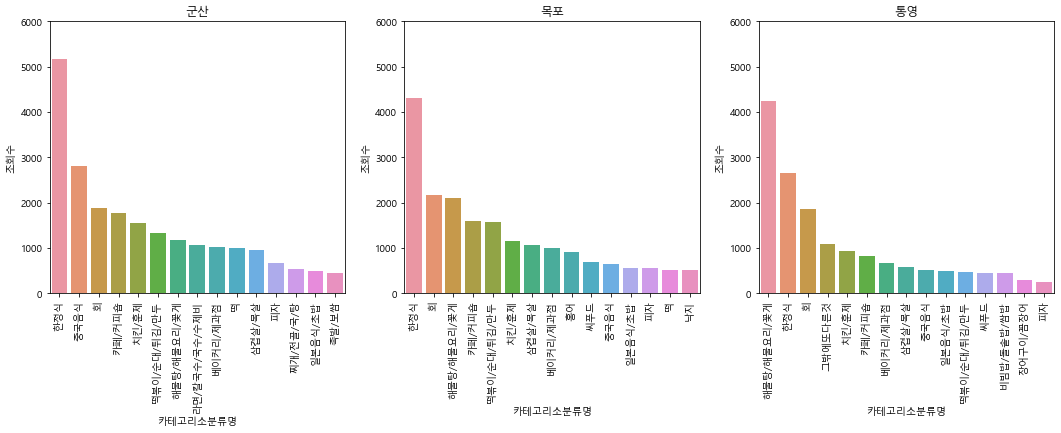

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.barplot(data=GunSan_sub, x=GunSan_sub.index, y='INQ_CNT')
plt.xticks(rotation=90)
plt.ylim(0, 6000)
plt.xlabel('카테고리소분류명')
plt.ylabel('조회수')
plt.title('군산')

plt.subplot(132)
sns.barplot(data=MokPo_sub, x=MokPo_sub.index, y='INQ_CNT')
plt.xticks(rotation=90)
plt.ylim(0, 6000)
plt.xlabel('카테고리소분류명')
plt.ylabel('조회수')
plt.title('목포')

plt.subplot(133)
sns.barplot(data=TongYeong_sub, x=TongYeong_sub.index, y='INQ_CNT')
plt.xticks(rotation=90)
plt.ylim(0, 6000)
plt.xlabel('카테고리소분류명')
plt.ylabel('조회수')
plt.title('통영')

plt.show()